<a href="https://colab.research.google.com/github/jasmineA20/psychic-broccoli/blob/main/FirstThreeWavefunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[5.84447929e-38 1.11966873e-37 1.86890511e-37 2.91851616e-37
 4.27151197e-37 5.92686465e-37 7.88403483e-37 1.01428324e-36
 1.27030329e-36 1.55774796e-36]
[5.84447889e-38 1.11966859e-37 1.86890493e-37 2.91851528e-37
 4.27151106e-37 5.92685938e-37 7.88402964e-37 1.01427693e-36
 1.27029495e-36 1.55645000e-36]


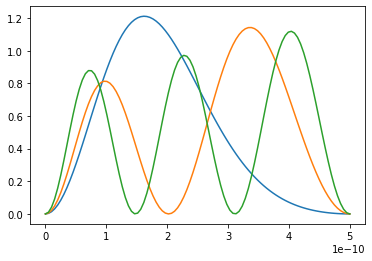

In [7]:
from os import sys
import matplotlib.pyplot as plt

#from pylab import *
from math import pi
from numpy import empty,sin,arange, linspace
from numpy.linalg import eigvalsh, eigh

L = 5e-10
hbar = 1.0546e-34
M = 9.1094e-31
q = 1.6022e-19
a = 10*q


def Hp(m,n):
	
	s=0
	
	if m==n:
		s+= hbar**2/8/M*pi**2*n**2
	
	def I(m,n):
		
		if m==n:
			return L**2/4
		elif (m+n)%2 == 1:
			return -(2*L/pi)**2* m*n/(m**2-n**2)**2
		else:
			return 0
	
	s += a/2*I(m,n)
	return s


N = 10
A = empty((N,N),float)
for i in range(N):
	for j in range(N):
		A[i,j] = Hp(i+1,j+1)
		
X,ksi = eigh(A)
print(X[:10])

# Calculating the matrix
N = 100
A = empty((N,N),float)
for i in range(N):
	for j in range(N):
		A[i,j] = Hp(i+1,j+1)
		
X,ksi = eigh(A)
print(X[:10])

def wavefunction(x,m=1):
	n = arange(1,N+1)
	s = sum(ksi[:,m]*sin(pi*n*x/L))
	return s**2

x = linspace(0,L,100)

for i in range(3):
	ksi_i = [wavefunction(xi,m=i) for xi in x]
	plt.plot(x,ksi_i,label=i)